In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math as m

def heat_v(states):
    arr = states
    df = pd.DataFrame(np.nan, index=np.arange(0, 21), columns=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])
    #df = df.fillna(-1)
    z = df.to_numpy()
    ds = pd.DataFrame(arr, columns=['Q', 'T', 'x'])
    h = ds.groupby(['Q', 'T']).mean().reset_index()
    a = h.to_numpy()

    for i in range(31):  # Maximum inventory is 20
        for ii in range(0, 11):  # Maximum time is 5
            for iii in range(len(a)):
                if i == a[iii, 0] and ii == a[iii, 1]:
                    z[int(i), int(ii)] = a[iii, 2]
    sns.heatmap(z, cmap="YlGnBu")
    plt.xlabel('Time')
    plt.ylabel('Inventory') 
    plt.title('Heatmap of the average action per inventory and time step')
    plt.show()

def column_min_max_normalize(matrix, min, max):#, data
    """
    Normalizes a matrix of real numbers between 1 and -1 domain using min-max normalization.
    """
    # Find the minimum and maximum values for each column
    #scaler = pre.MinMaxScaler(feature_range=(-1, 1)).fit(matrix)
    min_vals = min#np.min(matrix, axis=0)#np.min(data)#
    max_vals = max#np.max(matrix, axis=0)#np.max(data)#
    range_vals = max_vals - min_vals
    
    # Perform column-wise min-max normalization
    normalized_matrix = 2 * (matrix - min_vals) / range_vals - 1
    
    if normalized_matrix.shape != ():
        for i in range(normalized_matrix.shape[0]):
            for ii in range(normalized_matrix.shape[1]):
                if normalized_matrix[i,ii] > 1: normalized_matrix[i,ii] = 1
                elif normalized_matrix[i,ii] <-1: normalized_matrix[i,ii] = -1

    return normalized_matrix 

def heatAct(data, min, max):

    n = 101
    #data = mu0qtp
    FILLER = -1
    def heatdn(states, thr1, thr2, h_min, h_max):
        arr = states
        df = pd.DataFrame(np.nan, index=np.arange(-1,n), columns=['1', '2', '3', '4', '5','6','7','8','9','10'])
        df = df.fillna(np.nan)
        z = df.to_numpy()#np.zeros((21,5))
        ds = pd.DataFrame(arr,columns=['Q', 'T', 'p', 'x'])
        ds['p'] = ds['p'].apply(column_min_max_normalize, args=(h_min, h_max))
        h = ds.where(ds['p'] >= thr1).where(ds['p'] <= thr2).groupby(['Q','T','p']).mean().reset_index()
        a = h.to_numpy()
        for i in range(n): #mx 20
            for ii in range(10): #mx 5
                for iii in range(len(a[:])):
                    if i == a[:,0][iii] and ii == a[:,1][iii]:
                        z[int(i),int(ii)] = a[iii,3]
        return z    # Create a 2x2 grid of subplots
    fig, axs = plt.subplots(2, 2, figsize=(10, 20))

    # Loop through each subplot and generate a heatmap for it
    cmap = sns.color_palette("YlGnBu", as_cmap=True)
    cmap.set_bad((1,1,0.7))
    #ns.heatmap(z, cmap=cmap)
    for i in range(2):
        for j in range(2):
            if i == 0 and j == 0:

                ax = sns.heatmap(heatdn(data,-0.75  ,-0.5, min,  max), ax=axs[i,j], cmap=cmap)
                ax.set_title('$-1 \leq \\bar{S} \leq -0.5$')#                

            elif i == 0 and j == 1:
                ax =sns.heatmap(heatdn(data,-0.5  ,0, min,  max), ax=axs[i,j],  cmap=cmap)
                ax.set_title('$-0.5 \leq \\bar{S} \leq 0$')#
            elif i == 1 and j == 0:
                ax =sns.heatmap(heatdn(data,0  ,0.5, min,  max), ax=axs[i,j],   cmap=cmap)
                ax.set_title('$0 \leq \\bar{S} \leq 0.5$')#
            else:
                ax =sns.heatmap(heatdn(data,0.5  ,0.75, min,  max), ax=axs[i,j],   cmap=cmap)
                ax.set_title('$0.5 \leq \\bar{S} \leq 1$')#
            #for h in range(len(q)):
            #    rect = plt.Rectangle((h, int(q[h])), 1, 1, fill=None, edgecolor='red', linewidth=1)
            #    ax.add_patch(rect)   
    # Add a main title to the figure
    fig.suptitle('Average $v$ conditioned to Q,T,$\\bar{S}$')

    # Show the figure
    plt.show()
    
def remove_outliers(data):
    # Calculate the IQR (Interquartile Range)
    Q1 = np.percentile(data, 10)
    Q3 = np.percentile(data, 90)
    IQR = Q3 - Q1

    # Define lower and upper bounds to identify outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers
    filtered_data = data[(data >= lower_bound) & (data <= upper_bound)]
    return filtered_data

def rewards_per_episode(rew_0, rew_1, rew_sch_0, rew_sch_1):
    # Load rewards data
    rewards_0 = rew_0
    rewards_1 = rew_1

    # Load rewards_sch data
    rewards_sch_0 = rew_sch_0
    rewards_sch_1 = rew_sch_1

    # Time steps to plot
    time_steps_to_plot = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500]

    # Create figure and subplots
    fig, axs = plt.subplots(2, len(time_steps_to_plot)//2, figsize=(20, 8))

    # Store all data points in lists
    all_rewards_0 = []
    all_rewards_1 = []

    # Plot scatter plots for specified time steps
    for i, time_step in enumerate(time_steps_to_plot):
        row = i // (len(time_steps_to_plot)//2)
        col = i % (len(time_steps_to_plot)//2)
        ax = axs[row, col]

        # Generate a list of colors for each point
        colors = plt.cm.jet_r(np.linspace(0, 1, len(rewards_0)))  # Different colormap for rewards_0
        colors_sch = plt.cm.Set2(np.linspace(0, 1, len(rewards_sch_0)))  # Different colormap for rewards_sch

        # Plot rewards_0 and rewards_1
        for j in range(len(rewards_0)):
            ax.scatter(rewards_0[j, time_step], rewards_1[j, time_step], color=colors[j], s=300, alpha=1, label=f'time step {j+1}')
            ax.text(rewards_0[j, time_step], rewards_1[j, time_step], str(j+1), ha='center', va='center', fontsize=8, color='white')

        # Plot rewards_sch_0 and rewards_sch_1
        for k in range(len(rewards_sch_0)):
            ax.scatter(rewards_sch_0[k, time_step], rewards_sch_1[k, time_step], color=colors_sch[k], s=300, alpha=0.25, label=f'time step Sch. {k+1}')
            ax.text(rewards_sch_0[k, time_step], rewards_sch_1[k, time_step], str(k+1), ha='center', va='center', fontsize=8, color='white')

        ax.set_xlabel('Reward Ag. 1')
        ax.set_ylabel('Reward Ag. 2')
        ax.hlines(0, -300, 300, colors='k', linestyles='dashed', alpha=0.5)
        ax.vlines(0, -300, 300, colors='k', linestyles='dashed', alpha=0.5)
        ax.set_title(f'Scatter Plot episode {time_step}')

        # Store all data points
        all_rewards_0.extend(rewards_0[:, time_step])
        all_rewards_1.extend(rewards_1[:, time_step])

    # Set the same x-axis and y-axis limits for all subplots
    #for ax in axs.flat:
    #    ax.set_xlim(-70, 70)
    #    ax.set_ylim(-70, 70)
    # Add legend
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(1, 1), title='Legend')
    
    # Adjust spacing between subplots
    plt.tight_layout()

    # Show the plots
    plt.show()


def rewards_per_simulation(re_tot, rewards_sch):

    #rewards_sch_0 = rewards_sch[:, 0]
    #rewards_sch_1 = rewards_sch[:, 1]



    # Assuming re_tot, rewards_0, rewards_1, and rewards_sch_0 have been defined earlier

    fig, axs = plt.subplots(2, 5, figsize=(20, 8))  # 2 rows, 5 columns

    colors = plt.cm.jet_r(np.linspace(0, 1, re_tot.shape[2]))  # Different colormap for rewards_0
    colors_sch = plt.cm.Set2(np.linspace(0, 1, len(rewards_sch[:, 0])))

    for simu in range(min(re_tot.shape[0], 10)):  # Iterate over simulation steps, limited to 10
        row = simu // 5  # Determine the row index
        col = simu % 5  # Determine the column index
        ax = axs[row, col]
        for j in range(re_tot.shape[2]):  # Iterate over the simulation steps
            # Accessing individual elements of re_tot[simu, 0, j] and re_tot[simu, 1, j]
            ax.scatter(re_tot[simu, 0, j, -1].item(), re_tot[simu, 1, j, -1].item(),
                       color=colors[j], s=300, alpha=1, label=f'time step RL {j+1}')
            ax.text(re_tot[simu, 0, j, -1].item(), re_tot[simu, 1, j, -1].item(),
                    str(j), ha='center', va='center', fontsize=8, color='white')


            ax.set_xlabel('Reward Ag. 1')
            ax.set_ylabel('Reward Ag. 2')
            ax.hlines(0, -400, 400, colors='k', linestyles='dashed', alpha=0.5)
            ax.vlines(0, -450, 400, colors='k', linestyles='dashed', alpha=0.5)
            ax.set_title(f'Scatter Plot simulation {simu}')


            ax.scatter(rewards_sch[simu, 0, j, -1].item(), rewards_sch[simu, 1, j, -1].item(),
                         color=colors_sch[j], s=300, alpha=0.25, label=f'time step Nash. {j}')
            ax.text(rewards_sch[simu, 0, j, -1].item(), rewards_sch[simu, 1, j, -1].item(),
                    str(j), ha='center', va='center', fontsize=8, color='white')

        # Calculate correlation coefficient
        corr_coef = np.corrcoef(re_tot[simu, 0, :, -1], re_tot[simu, 1, :, -1])[0, 1]
        # Print correlation coefficient below the plot
        #ax.text(0.5, -0.2, f'Correlation Coefficient: {corr_coef:.2f}', ha='center', va='center', transform=ax.transAxes)

    for ax in axs.flat:
        ax.set_xlim(-400,300)
        ax.set_ylim(-450,300)

    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(1, 0.9), title='Legend:')
    fig.suptitle('Scatter Plots of Average Rewards per Time Step for Unconstrained Agents over 10 Simulations')

    plt.tight_layout()  # Adjust spacing between subplots
    plt.show()


def rewards_per_episode_1_solo(rew_0, rew_1, rew_sch_0, rew_sch_1, time_step):
    # Load rewards data
    rewards_0 = rew_0
    rewards_1 = rew_1

    # Load rewards_sch data
    rewards_sch_0 = rew_sch_0
    rewards_sch_1 = rew_sch_1

    # Create figure and subplot
    fig, ax = plt.subplots(figsize=(10, 6))

    # Generate a list of colors for each point
    colors = plt.cm.jet_r(np.linspace(0, 1, len(rewards_0)))  # Different colormap for rewards_0
    colors_sch = plt.cm.Set2(np.linspace(0, 1, len(rewards_sch_0)))  # Different colormap for rewards_sch

    # Plot rewards_0 and rewards_1
    for j in range(len(rewards_0)):
        ax.scatter(rewards_0[j, time_step], rewards_1[j, time_step], color=colors[j], s=300, alpha=1, label=f'time step {j+1}')
        ax.text(rewards_0[j, time_step], rewards_1[j, time_step], str(j+1), ha='center', va='center', fontsize=8, color='white')

    # Plot rewards_sch_0 and rewards_sch_1
    for k in range(len(rewards_sch_0)):
        ax.scatter(rewards_sch_0[k, time_step], rewards_sch_1[k, time_step], color=colors_sch[k], s=300, alpha=0.25, label=f'time step Sch. {k+1}')
        ax.text(rewards_sch_0[k, time_step], rewards_sch_1[k, time_step], str(k+1), ha='center', va='center', fontsize=8, color='white')

    ax.set_xlabel('Reward Ag. 1')
    ax.set_ylabel('Reward Ag. 2')
    ax.hlines(0, -300, 300, colors='k', linestyles='dashed', alpha=0.5)
    ax.vlines(0, -300, 300, colors='k', linestyles='dashed', alpha=0.5)
    ax.set_title(f'Scatter Plot episode {time_step}')

    # Add legend
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, loc='upper left', title='Legend')

    # Show the plot
    plt.show()

def process_data(file_path):
    INV = 100
    azioni = (np.load(file_path, allow_pickle=True))
    
    azionimu0 = azioni[:,0].mean(axis=0).mean(axis=1)
    q0 = np.zeros(11)
    q0[0] = INV
    for i in range(1, 10):
        q0[i] = q0[i - 1] - azionimu0[i - 1]

    azionimu0qtp = azioni[:,1].mean(axis=0).mean(axis=1)
    q = np.zeros(11)
    q[0] = INV
    for i in range(1, 10):
        q[i] = q[i - 1] - azionimu0qtp[i - 1]

    azioni_tw = np.ones((5_000, 10)) * 2
    twat = azioni_tw.reshape(-1, 10).mean(0)
    twap = np.zeros(11)
    twap[0] = INV
    for i in range(1, 10):
        twap[i] = twap[i - 1] - twat[i - 1]

    T = 10  # Assuming T is defined somewhere in your code
    q_0 = 100  # Assuming q_0 is defined somewhere in your code
    azioni1 = azioni[:, 0].mean(axis=0).mean(axis=1)
    azioni2 = azioni[:, 1].mean(axis=0).mean(axis=1)
    azioni_combined = (azioni1 + azioni2)  #/2
    qt = np.zeros(T + 1)
    qt[0] = q_0
    for i in range(1, T):
        qt[i] = qt[i - 1] - azioni_combined[i - 1]
    
    return q0, q, qt, twap

def rewards_per_simulation_hist(re_tot, rewards_sch):

    #rewards_sch_0 = rewards_sch[:, 0]
    #rewards_sch_1 = rewards_sch[:, 1]



    # Assuming re_tot, rewards_0, rewards_1, and rewards_sch_0 have been defined earlier

    fig, axs = plt.subplots(2, 5, figsize=(20, 8))  # 2 rows, 5 columns

    colors = plt.cm.jet_r(np.linspace(0, 1, re_tot.shape[2]))  # Different colormap for rewards_0
    colors_sch = plt.cm.Set2(np.linspace(0, 1, len(rewards_sch[:, 0])))

    for simu in range(min(re_tot.shape[0], 10)):  # Iterate over simulation steps, limited to 10
        row = simu // 5  # Determine the row index
        col = simu % 5  # Determine the column index
        ax = axs[row, col]
        for j in range(re_tot.shape[2]):  # Iterate over the simulation steps
            # Accessing individual elements of re_tot[simu, 0, j] and re_tot[simu, 1, j]
            ax.hist(remove_outliers(re_tot[simu, 0].mean(0).flatten()), bins=100, alpha = 0.1, color = 'green', label= j)#f'agente 1' if j == 0 else None
            ax.hist(remove_outliers(re_tot[simu, 1].mean(0).flatten()), bins=100, alpha = 0.1, color = 'blue' , label= j)#f'agente 2' if j == 0 else None
            #ax.hist(remove_outliers(rewards_sch[simu, 0].mean(0).flatten()), bins=100, alpha = 0.2, color = 'red', label = 'agente Nash'if j == 0 else None)
            ax.vlines(1.12, 0, 150, color = 'red', label = 'Nash Agent'if j == 0 else None)
            ax.set_title(f"Simulation {simu}")
            ax.set_xlabel('Rewards')
            ax.set_ylabel('Frequency')
            ax.vlines((re_tot[simu, 0].mean(0).mean(0)+re_tot[simu, 1].mean(0).mean(0))/2, 0, 150, color='orange', label='Agent Mean' if j == 0 else None)


        # Calculate correlation coefficient
        #corr_coef = np.corrcoef(re_tot[simu, 0, :, -1], re_tot[simu, 1, :, -1])[0, 1]
        # Print correlation coefficient below the plot
        #ax.text(0.5, -0.2, f'Correlation Coefficient: {corr_coef:.2f}', ha='center', va='center', transform=ax.transAxes)


    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(1, 0.9), title='Legend:')
    fig.suptitle('Scatter Plots of Average Rewards per Time Step for Unconstrained Agents over 10 Simulations')

    plt.tight_layout()  # Adjust spacing between subplots
    plt.show()


def make_selling_schedule(a, azioni, T, i=0, inv=100):
    azioni_tot_1 = azioni[i, 0]
    azioni_tot_2 = azioni[i, 1]
    agent_1 = azioni_tot_1.mean(axis=1)
    agent_2 = azioni_tot_2.mean(axis=1)
    
    q0_1 = np.zeros(T + 1)
    q0_1[0] = inv
    for j in range(1, T):
        q0_1[j] = q0_1[j - 1] - agent_1[j - 1]
    q0_2 = np.zeros(T + 1)
    q0_2[0] = inv
    for j in range(1, T):
        q0_2[j] = q0_2[j - 1] - agent_2[j - 1]
    q_tot = inv# * 2
    azioni_t = (agent_1 + agent_2) / 2
    qt = np.zeros(T + 1)
    qt[0] = q_tot
    for j in range(1, T):
        qt[j] = qt[j - 1] - azioni_t[j - 1]

    azioni_tw = np.ones((5_000,10)) * 10
    twat = azioni_tw.reshape(-1,10).mean(0)
    twap = np.zeros(11) 
    twap[0] = 100
    for i in range(1,10):
        twap[i] =  twap[i - 1] - twat[i - 1]

    b = np.asarray(a) / 2

    ax.plot(q0_1, label='Agent 1' if i == 0 else None)
    ax.plot(q0_2, label='Agent 2' if i == 0 else None)
    ax.plot(qt, alpha = 0.5, label='Mean Agents' if i == 0 else None, linestyle='--')
    ax.plot(b, label='Nash Agent'if i == 0 else None, linestyle=':')
    ax.plot(twap, label = 'twap' if i == 0 else None, linestyle='-.')

def do_is(i, dati, azioni, alpha=0.002):
    dati =      dati[i,:,0]
    azioni1 =  azioni[i, 0]
    azioni2 =  azioni[i, 0]
    azioni = (azioni1 + azioni2)
    iss = []

    for i in range(dati.reshape(-1,T).shape[0]):
        iss.append((dati.reshape(-1,T)[i])* azioni[:,i] - alpha * azioni[:,i]**2)

    agents = np.sum((np.asarray(iss)),axis=1)
    agents_std = np.sum((np.asarray(iss)),axis=1).std()

    return 2000-remove_outliers(agents).mean(),  agents_std



In [3]:
q_0 = 200
T = 10
gamma = 0.001 # permanent impact k
lambd = 0.002 # temporary impact a
alpha = 1e-9 # risk aversion 
sigma = 0.00001 # volatility 
theta_hat = np.sqrt(gamma**2 + 4*alpha*sigma**2*lambd)/(2*lambd)
rho_hat = np.sqrt(gamma**2+12*alpha*sigma**2*lambd)/(6*lambd)
rho_plus = -gamma/(6*lambd) + rho_hat
rho_minus = -gamma/(6*lambd) - rho_hat
a = [q_0,]
for i in range(1,T+1):
    a.append((q_0 )/(2*m.sinh(rho_hat*T)) * (m.exp(rho_hat * T) * m.exp(rho_minus*i) - m.exp(-rho_hat * T) * m.exp(rho_plus*i)))

x = abs(np.diff(np.asarray(a)))
x

array([37.85320122, 32.04204306, 27.12300388, 22.95912711, 19.43448152,
       16.45093344, 13.92541451, 11.7876089 ,  9.97799551,  8.44619085])

In [3]:
import numpy as np

import matplotlib.pyplot as plt
q_0 = 100
N = 10
gamma = 0.001 # permanent impact k
alpha = 0.002 # temporary impact a
 
sigma = 0.00001 # volatility 
tau = 1/N
v1 = [] 
v2 = []
q10 = 100
q20 = 100 
q_t_1 = [q10,]
q_t_2 = [q20,]
for i in range(1,N+1):
    v1.append((q_0 / N) + ((2 * q_0 - q_t_1[i-1] - q_t_2[i-1]) / (2 * alpha)) * (1 - gamma))
    v2.append((q_0 / N) + ((2 * q_0 - q_t_1[i-1] - q_t_2[i-1]) / (2 * alpha)) * (1 - gamma))

    q_t_1.append(q_t_1[i-1] - v1[i-1])
    q_t_2.append(q_t_2[i-1] - v2[i-1])



(q_t_1, v1)

([100,
  90.0,
  -4915.0,
  -2509917.5,
  -1256263668.75,
  -628760016169.375,
  -314694388142732.2,
  -1.575045412654874e+17,
  -7.88310229033765e+19,
  -3.945492696313994e+22,
  -1.9747190945051535e+25],
 [10.0,
  5005.0,
  2505002.5,
  1253753751.25,
  627503752500.625,
  314065628126562.8,
  1.5718984687734467e+17,
  7.8673518362111e+19,
  3.937609594023656e+22,
  1.9707736018088396e+25])

In [45]:
((2 * q_0 - q_t_1[i-1] - q_t_2[i-1]) / (2 * alpha)) * (1 - gamma)
q_t_1

[100,
 90.0,
 -419.5,
 -26378.525,
 -1348990.84875,
 -68736088.7438125,
 -3502108726.497247,
 -178432444620.03476,
 -9091133058395.771,
 -463193229330269.5,
 -2.3599695034382236e+16]

- Caso con volatilità più alta
- Collusion e Pareto optimality
- Nash per perm_imp->0 è AC? (con risk aversion)
- Centroidi e quadranti
- Corrispondenza tra centroidi e strategie
- Contare i punti nei quattro quadranti per le 3 volatilità
- Iniziare a scrivere quello che è stato fatto

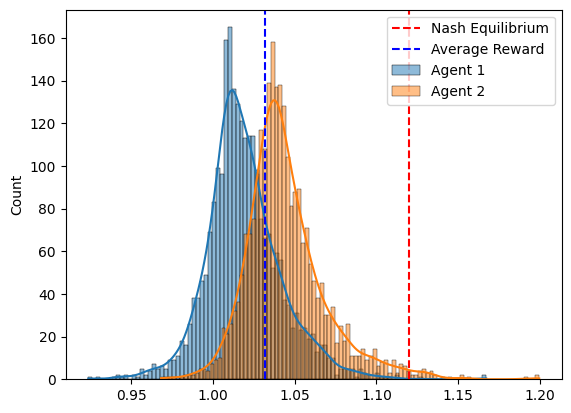

In [4]:
'''Plot dei rewards totali'''
rewards = (np.load('C:/Users/macri/Desktop/10_zero_vol/re_tot.npy', allow_pickle=True))
rewards_sch = (np.load('C:/Users/macri/Desktop/10_zero_vol/nash/re_tot.npy', allow_pickle=True))

sns.histplot((rewards[:,0].mean(axis=1).mean(0)), bins=100, kde=True, label='Agent 1');
sns.histplot((rewards[:,1].mean(axis=1).mean(0)), bins=100, kde=True, label='Agent 2');
plt.axvline(x=1.12, color='r', linestyle='--', label='Nash Equilibrium')
plt.axvline(x=(rewards[:,0].mean(axis=1).mean(0).mean() + (rewards[:,1].mean(axis=1).mean(0).mean()))/2, color='b', linestyle='--', label='Average Reward')
plt.legend()
plt.show()

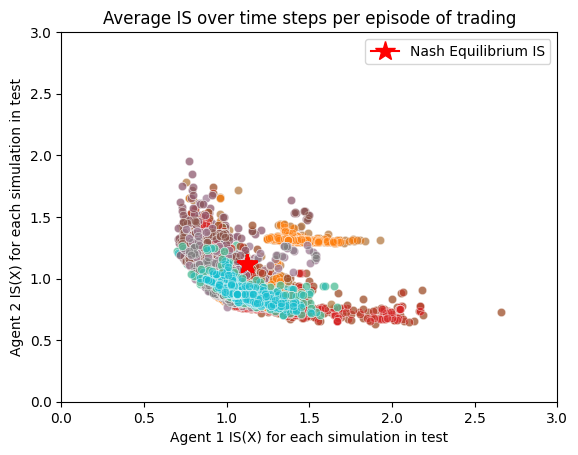

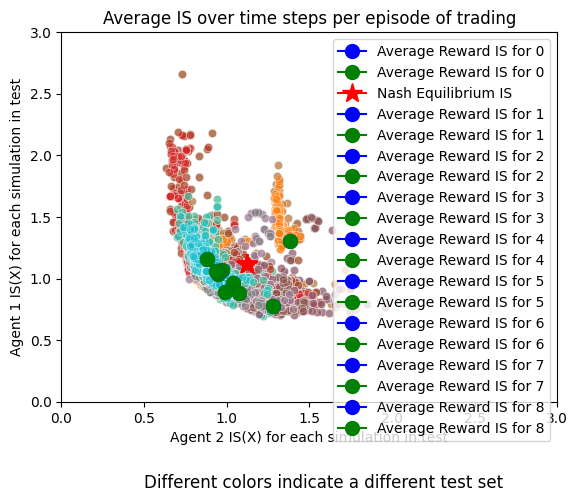

In [5]:
re_tot_2  = (np.load('C:/Users/macri/Desktop/10_zero_vol/re_tot.npy'))
re_tot_zero = (np.load('C:/Users/macri/Desktop/10_zero_vol/re_tot.npy'))

re_sch = dict(np.load('C:/Users/macri/Desktop/10_media_vol_0_001/nash/re.npz'))['arr_0']
nash = re_sch.mean(0).mean(0).mean()

for i in range(10):
    sns.scatterplot(x=re_tot_2[i, 1].mean(0), y=re_tot_2   [i, 0].mean(0), alpha=0.5)
    sns.scatterplot(x=re_tot_zero[i, 1].mean(0), y=re_tot_zero   [i, 0].mean(0), alpha=0.5)
    plt.plot(nash, nash, marker='*', markersize=15, color='red', label = 'Nash Equilibrium IS' if i == 0 else None)


#ax.text(rewards_sch_0[k, time_step], rewards_sch_1[k, time_step], str(k+1), ha='center', va='center', fontsize=8, color='white')

plt.ylim(0, 3)
plt.xlim(0, 3)

plt.xlabel(r'Agent 1 IS(X) for each simulation in test')
plt.ylabel(r'Agent 2 IS(X) for each simulation in test')
plt.title('Average IS over time steps per episode of trading')    
plt.legend()
plt.show()

for i in range(10):
    sns.scatterplot(y=re_tot_2[i, 1].mean(0), x=re_tot_2   [i, 0].mean(0), alpha=0.5)
    sns.scatterplot(y=re_tot_zero[i, 1].mean(0), x=re_tot_zero   [i, 0].mean(0), alpha=0.5)
    plt.plot(re_tot_2[i, 1].mean(0).mean(), re_tot_2[i, 0].mean(0).mean(), marker='o', markersize=10, color='blue', label = f'Average Reward IS for {i}' )
    plt.plot(re_tot_zero[i, 1].mean(0).mean(), re_tot_zero[i, 0].mean(0).mean(), marker='o', markersize=10, color='green', label = f'Average Reward IS for {i}' )
    plt.plot(nash, nash, marker='*', markersize=15, color='red', label = 'Nash Equilibrium IS' if i == 0 else None)
    
plt.ylim(0, 3)
plt.xlim(0, 3)

plt.xlabel(r'Agent 2 IS(X) for each simulation in test')
plt.ylabel(r'Agent 1 IS(X) for each simulation in test')
plt.title('Average IS over time steps per episode of trading')    
plt.text(0.5, -0.7, 'Different colors indicate a different test set', fontsize=12)
#plt.legend()
plt.show()

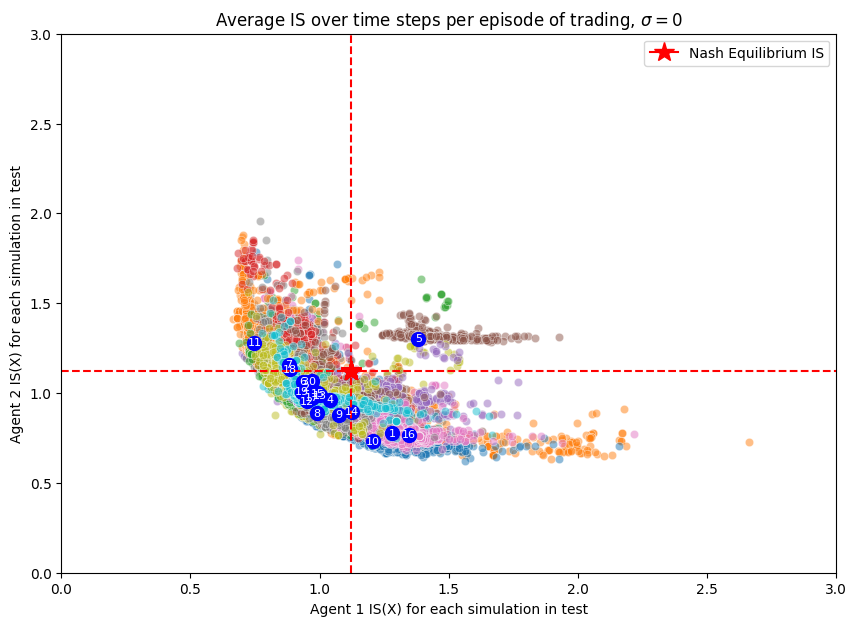

In [7]:
import torch

re_tot_2    = torch.tensor((np.load('C:/Users/macri/Desktop/10_zero_vol/re_tot.npy')))
re_tot_zero = torch.tensor((np.load('C:/Users/macri/Desktop/10_zero_vol/altra/re_tot.npy')))

concatenated_tensor = torch.cat((re_tot_2, re_tot_zero), dim=0)
re_sch = dict(np.load('C:/Users/macri/Desktop/10_media_vol_0_001/nash/re.npz'))['arr_0']
nash = re_sch.mean(0).mean(0).mean()

plt.figure(figsize=(10, 7))
for i in range(20):
    sns.scatterplot(x=concatenated_tensor[i, 1].mean(0), y=concatenated_tensor[i, 0].mean(0), alpha=0.5)
    plt.plot(concatenated_tensor[i, 1].mean(0).mean(), concatenated_tensor[i, 0].mean(0).mean(), marker='o', markersize=10, color='blue' )
    plt.text(concatenated_tensor[i, 1].mean(0).mean(), concatenated_tensor[i, 0].mean(0).mean(), str(i), ha='center', va='center', fontsize=8, color='white')
    
    plt.plot(nash, nash, marker='*', markersize=15, color='red', label = 'Nash Equilibrium IS' if i == 0 else None)

plt.axhline(y=nash, color='r', linestyle='--')
plt.axvline(x=nash, color='r', linestyle='--')

plt.ylim(0, 3)
plt.xlim(0, 3)

plt.xlabel(r'Agent 1 IS(X) for each simulation in test')
plt.ylabel(r'Agent 2 IS(X) for each simulation in test')
plt.title(r'Average IS over time steps per episode of trading, $\sigma = 0$')    
plt.legend()
plt.show()


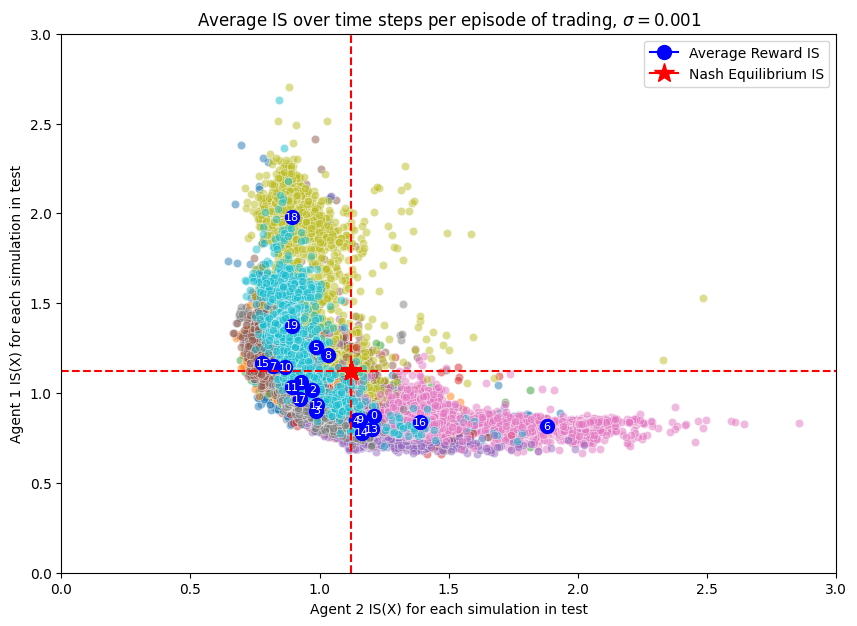

In [26]:
import torch

re_1    = torch.tensor((np.load('C:/Users/macri/Desktop/10_media_vol_0_001/altra_simile/re_tot.npy')))
re_2 = torch.tensor((np.load('C:/Users/macri/Desktop/10_media_vol_0_001/altra_contrario/re_tot.npy')))


concatenated_tensor = torch.cat((re_1, re_2), dim=0)
re_sch = dict(np.load('C:/Users/macri/Desktop/10_media_vol_0_001/nash/re.npz'))['arr_0']
nash = re_sch.mean(0).mean(0).mean()

plt.figure(figsize=(10, 7))
for i in range(20):
    sns.scatterplot(x=concatenated_tensor[i, 1].mean(0), y=concatenated_tensor[i, 0].mean(0), alpha=0.5)
    plt.plot(concatenated_tensor[i, 1].mean(0).mean(), concatenated_tensor[i, 0].mean(0).mean(), marker='o', markersize=10, color='blue', label = f'Average Reward IS' if i == 0 else None)
    plt.text(concatenated_tensor[i, 1].mean(0).mean(), concatenated_tensor[i, 0].mean(0).mean(), str(i), ha='center', va='center', fontsize=8, color='white')
    
    plt.plot(nash, nash, marker='*', markersize=15, color='red', label = 'Nash Equilibrium IS' if i == 0 else None)

plt.axhline(y=nash, color='r', linestyle='--')
plt.axvline(x=nash, color='r', linestyle='--')

plt.ylim(0, 3)
plt.xlim(0, 3)

plt.xlabel(r'Agent 2 IS(X) for each simulation in test')
plt.ylabel(r'Agent 1 IS(X) for each simulation in test')
plt.title(r'Average IS over time steps per episode of trading, $\sigma = 0.001$')    
plt.legend()
plt.show()


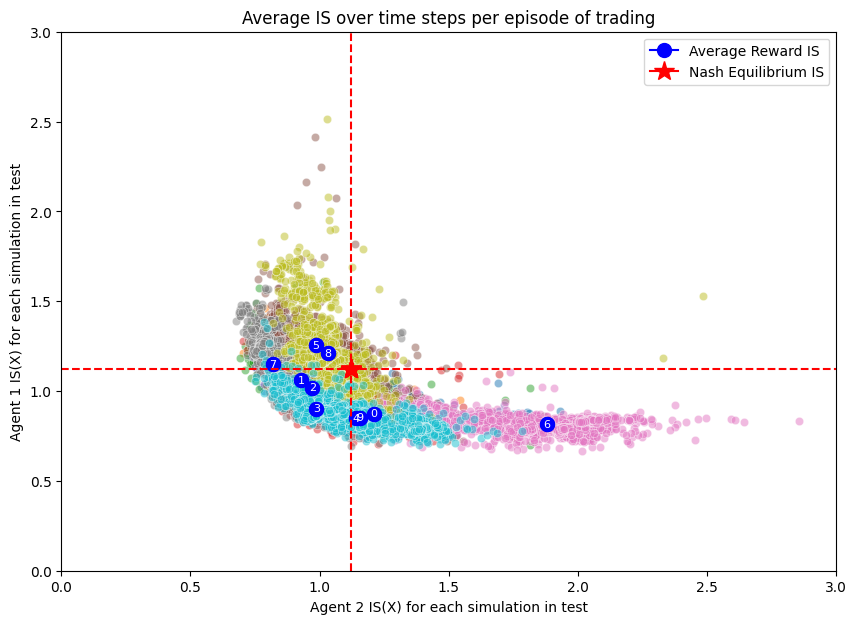

In [25]:
#re_tot_al  = (np.load('C:/Users/macri/Desktop/10_media_vol_0_001/re_tot.npy'))
re_tot_2  = (np.load('C:/Users/macri/Desktop/10_media_vol_0_001/ALTRA_SIMILE/re_tot.npy'))#(np.load('C:/Users/macri/Desktop/10_media_vol_0_001/altra_contrario/re_tot.npy'))#
#re_tot_zero = 

re_sch = dict(np.load('C:/Users/macri/Desktop/10_media_vol_0_001/nash/re.npz'))['arr_0']
nash = re_sch.mean(0).mean(0).mean()

plt.figure(figsize=(10, 7))
for i in range(10):
    sns.scatterplot(x=re_tot_2[i, 1].mean(0), y=re_tot_2   [i, 0].mean(0), alpha=0.5)
    #sns.scatterplot(x=re_tot_zero[i, 1].mean(0), y=re_tot_zero   [i, 0].mean(0), alpha=0.5)
    plt.plot(re_tot_2[i, 1].mean(0).mean(), re_tot_2[i, 0].mean(0).mean(), marker='o', markersize=10, color='blue')
    plt.plot(re_tot_2[i, 1].mean(0).mean(), re_tot_2[i, 0].mean(0).mean(), marker='o', markersize=10, color='blue', label = f'Average Reward IS' if i == 0 else None)
    plt.plot(nash, nash, marker='*', markersize=15, color='red', label = 'Nash Equilibrium IS' if i == 0 else None)
    plt.text(re_tot_2[i, 1].mean(0).mean(), re_tot_2[i, 0].mean(0).mean(), str(i), ha='center', va='center', fontsize=8, color='white')

plt.axhline(y=nash, color='r', linestyle='--')
plt.axvline(x=nash, color='r', linestyle='--')
    
plt.ylim(0, 3)
plt.xlim(0, 3)

plt.xlabel(r'Agent 2 IS(X) for each simulation in test')
plt.ylabel(r'Agent 1 IS(X) for each simulation in test')
plt.title('Average IS over time steps per episode of trading')    
plt.legend()
plt.show()


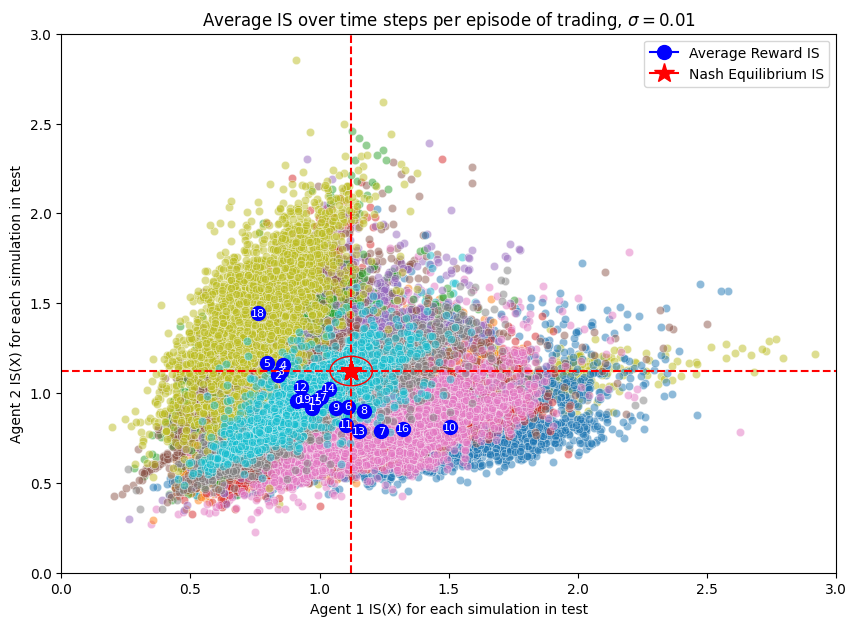

In [44]:
import torch

re_1 = torch.tensor((np.load('C:/Users/macri/Desktop/10_molta_vol_0_01/re_tot.npy')))
re_2 = torch.tensor((np.load('C:/Users/macri/Desktop/10_molta_vol_0_01/piu_nuova/re_tot.npy')))


concatenated_tensor = torch.cat((re_1, re_2), dim=0)
re_sch = (np.load('C:/Users/macri/Desktop/10_molta_vol_0_01/nash/re_tot.npy'))
nash = re_sch.mean(0).mean(0).mean()
radius = re_sch[:, 0].mean(axis=0).mean(0).std()

plt.figure(figsize=(10, 7))
for i in range(20):
    sns.scatterplot(x=concatenated_tensor[i, 1].mean(0), y=concatenated_tensor[i, 0].mean(0), alpha=0.5)
    plt.plot(concatenated_tensor[i, 1].mean(0).mean(), concatenated_tensor[i, 0].mean(0).mean(), marker='o', markersize=10, color='blue', label = f'Average Reward IS' if i == 0 else None)
    plt.text(concatenated_tensor[i, 1].mean(0).mean(), concatenated_tensor[i, 0].mean(0).mean(), str(i), ha='center', va='center', fontsize=8, color='white')
    circle = plt.Circle((nash, nash), 2*radius, color='r', fill=False)
    plt.gca().add_patch(circle)

    plt.plot(nash, nash, marker='*', markersize=15, color='red', label = 'Nash Equilibrium IS' if i == 0 else None)

plt.axhline(y=nash, color='r', linestyle='--')
plt.axvline(x=nash, color='r', linestyle='--')

plt.ylim(0, 3)
plt.xlim(0, 3)

plt.xlabel(r'Agent 1 IS(X) for each simulation in test')
plt.ylabel(r'Agent 2 IS(X) for each simulation in test')
plt.title(r'Average IS over time steps per episode of trading, $\sigma = 0.01$')    
plt.legend()
plt.show()

In [27]:
rewards_sch[:,0].mean(axis=0).mean(0).mean(), rewards_sch[:,0].mean(axis=0).mean(0).std()

(1.1218521099077199, 0.004087581581233545)

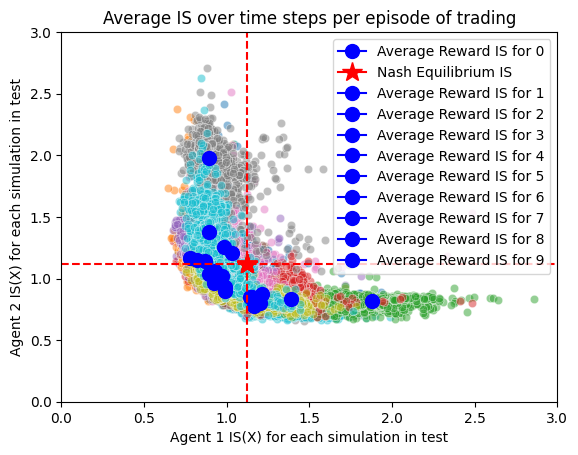

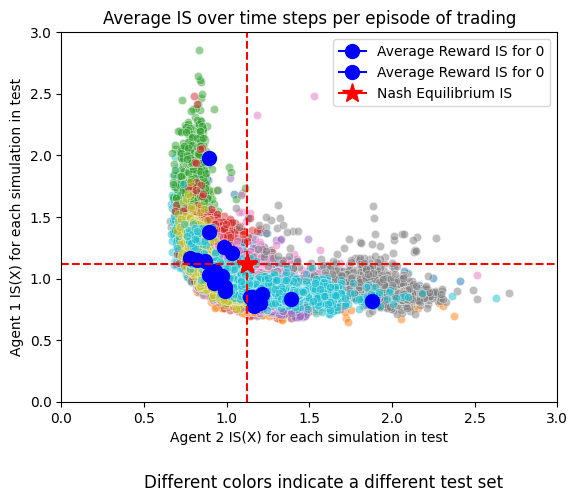

In [7]:
re_tot_al  = (np.load('C:/Users/macri/Desktop/10_media_vol_0_001/re_tot.npy'))
re_tot_2  = (np.load('C:/Users/macri/Desktop/10_media_vol_0_001/ALTRA_SIMILE/re_tot.npy'))
re_tot_zero = (np.load('C:/Users/macri/Desktop/10_media_vol_0_001/altra_contrario/re_tot.npy'))

re_sch = dict(np.load('C:/Users/macri/Desktop/10_media_vol_0_001/nash/re.npz'))['arr_0']
nash = re_sch.mean(0).mean(0).mean()

for i in range(10):
    sns.scatterplot(x=re_tot_2[i, 1].mean(0), y=re_tot_2   [i, 0].mean(0), alpha=0.5)
    sns.scatterplot(x=re_tot_zero[i, 1].mean(0), y=re_tot_zero   [i, 0].mean(0), alpha=0.5)
    plt.plot(re_tot_2[i, 1].mean(0).mean(), re_tot_2[i, 0].mean(0).mean(), marker='o', markersize=10, color='blue', label = f'Average Reward IS for {i}' )
    plt.plot(re_tot_zero[i, 1].mean(0).mean(), re_tot_zero[i, 0].mean(0).mean(), marker='o', markersize=10, color='blue')
    plt.plot(nash, nash, marker='*', markersize=15, color='red', label = 'Nash Equilibrium IS' if i == 0 else None)
plt.axhline(y=nash, color='r', linestyle='--')
plt.axvline(x=nash, color='r', linestyle='--')
    
plt.ylim(0, 3)
plt.xlim(0, 3)

plt.xlabel(r'Agent 1 IS(X) for each simulation in test')
plt.ylabel(r'Agent 2 IS(X) for each simulation in test')
plt.title('Average IS over time steps per episode of trading')    
plt.legend()
plt.show()

for i in range(10):
    sns.scatterplot(y=re_tot_2[i, 1].mean(0), x=re_tot_2   [i, 0].mean(0), alpha=0.5)
    sns.scatterplot(y=re_tot_zero[i, 1].mean(0), x=re_tot_zero   [i, 0].mean(0), alpha=0.5)
    plt.plot(re_tot_2[i, 1].mean(0).mean(), re_tot_2[i, 0].mean(0).mean(), marker='o', markersize=10, color='blue', label = f'Average Reward IS for {i}' if i == 0 else None)
    plt.plot(re_tot_zero[i, 1].mean(0).mean(), re_tot_zero[i, 0].mean(0).mean(), marker='o', markersize=10, color='blue', label = f'Average Reward IS for {i}' if i == 0 else None)
    plt.plot(nash, nash, marker='*', markersize=15, color='red', label = 'Nash Equilibrium IS' if i == 0 else None)

plt.axhline(y=nash, color='r', linestyle='--')
plt.axvline(x=nash, color='r', linestyle='--')
    
plt.ylim(0, 3)
plt.xlim(0, 3)

plt.xlabel(r'Agent 2 IS(X) for each simulation in test')
plt.ylabel(r'Agent 1 IS(X) for each simulation in test')
plt.title('Average IS over time steps per episode of trading')    
plt.text(0.5, -0.7, 'Different colors indicate a different test set', fontsize=12)
plt.legend()
plt.show()

In [8]:
'''t-tests'''

from scipy import stats
print(
't-test agent 1 vs nash',stats.ttest_ind(rewards[:,1].flatten(), rewards_sch[:,0].flatten(), equal_var=False),'\n'
't-test agent 2 vs nash',stats.ttest_ind(rewards[:,0].flatten(), rewards_sch[:,1].flatten(), equal_var=False), '\n'
't-test agent 1 vs agent 2',stats.ttest_ind(rewards[:,0].flatten(), rewards[:,1].flatten(), equal_var=False))

t-test agent 1 vs nash Ttest_indResult(statistic=-0.3786959492581401, pvalue=0.704913921010882) 
t-test agent 2 vs nash Ttest_indResult(statistic=-0.48263316354550156, pvalue=0.6293565743788456) 
t-test agent 1 vs agent 2 Ttest_indResult(statistic=-0.09151380537528749, pvalue=0.9270843739102035)


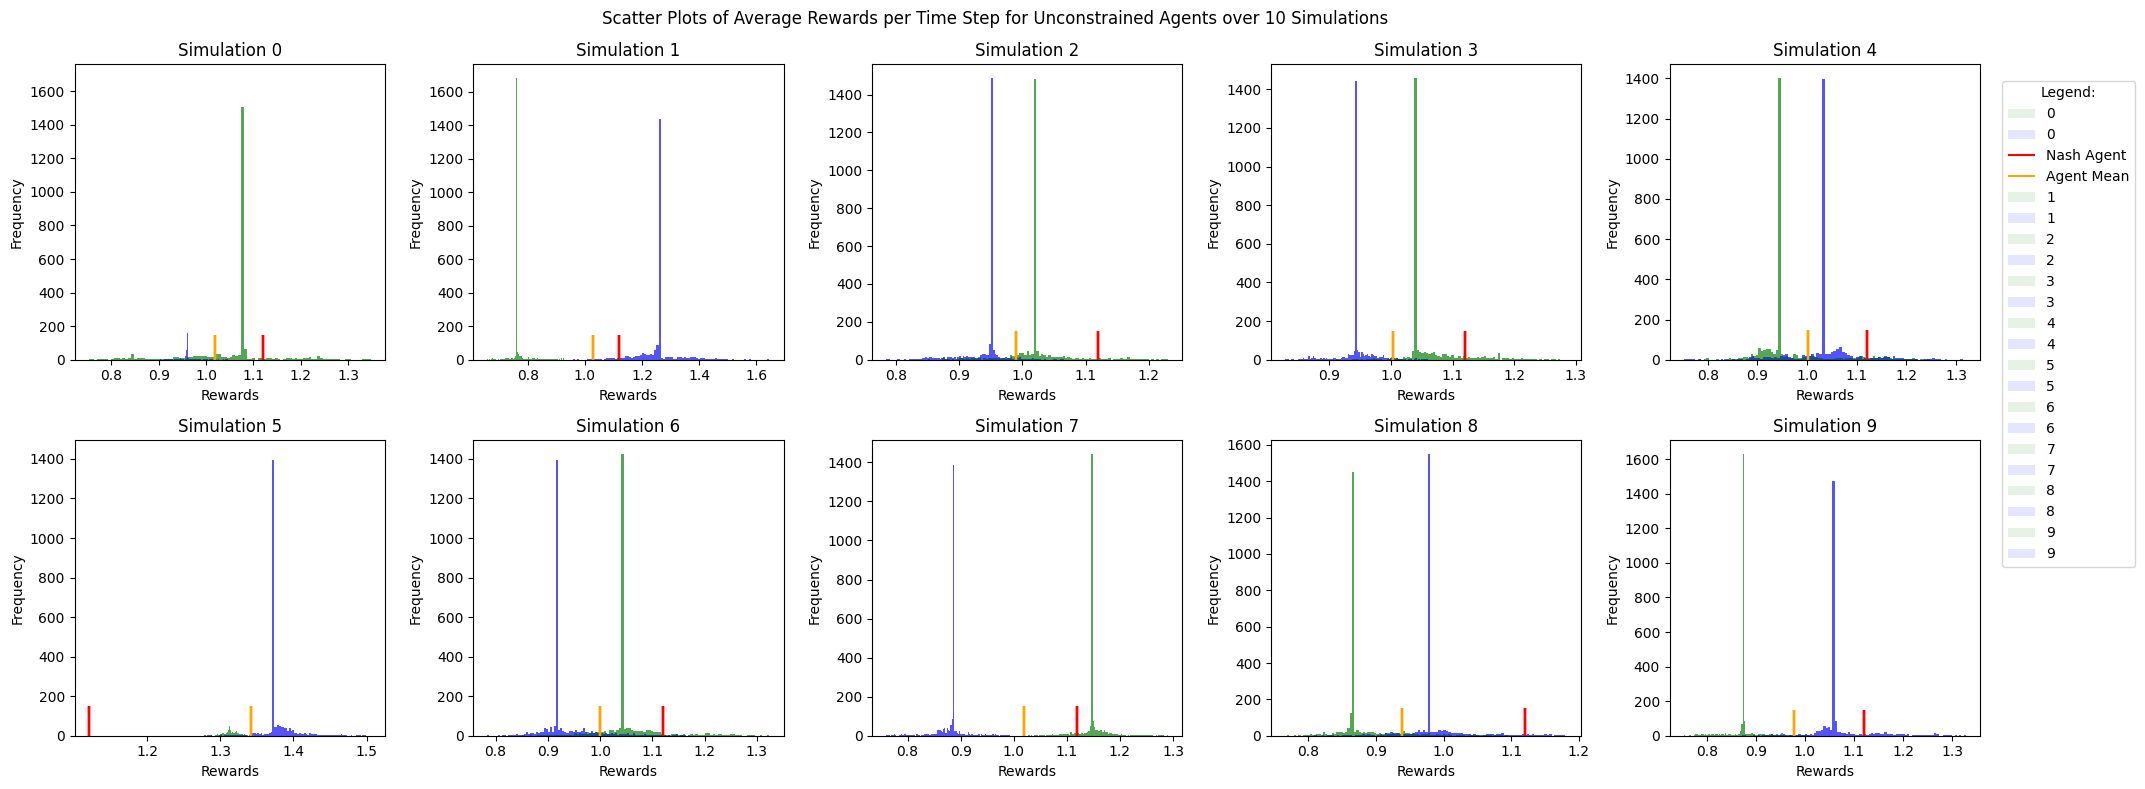

In [9]:
'''Istogramma dei rewards per simulazione'''
rewards = np.load('C:/Users/macri/Desktop/10_zero_vol/re_tot.npy', allow_pickle=True)
rewards_sch = (np.load('C:/Users/macri/Desktop/10_zero_vol/nash/re_tot.npy', allow_pickle=True))
rewards_per_simulation_hist(rewards, rewards_sch)

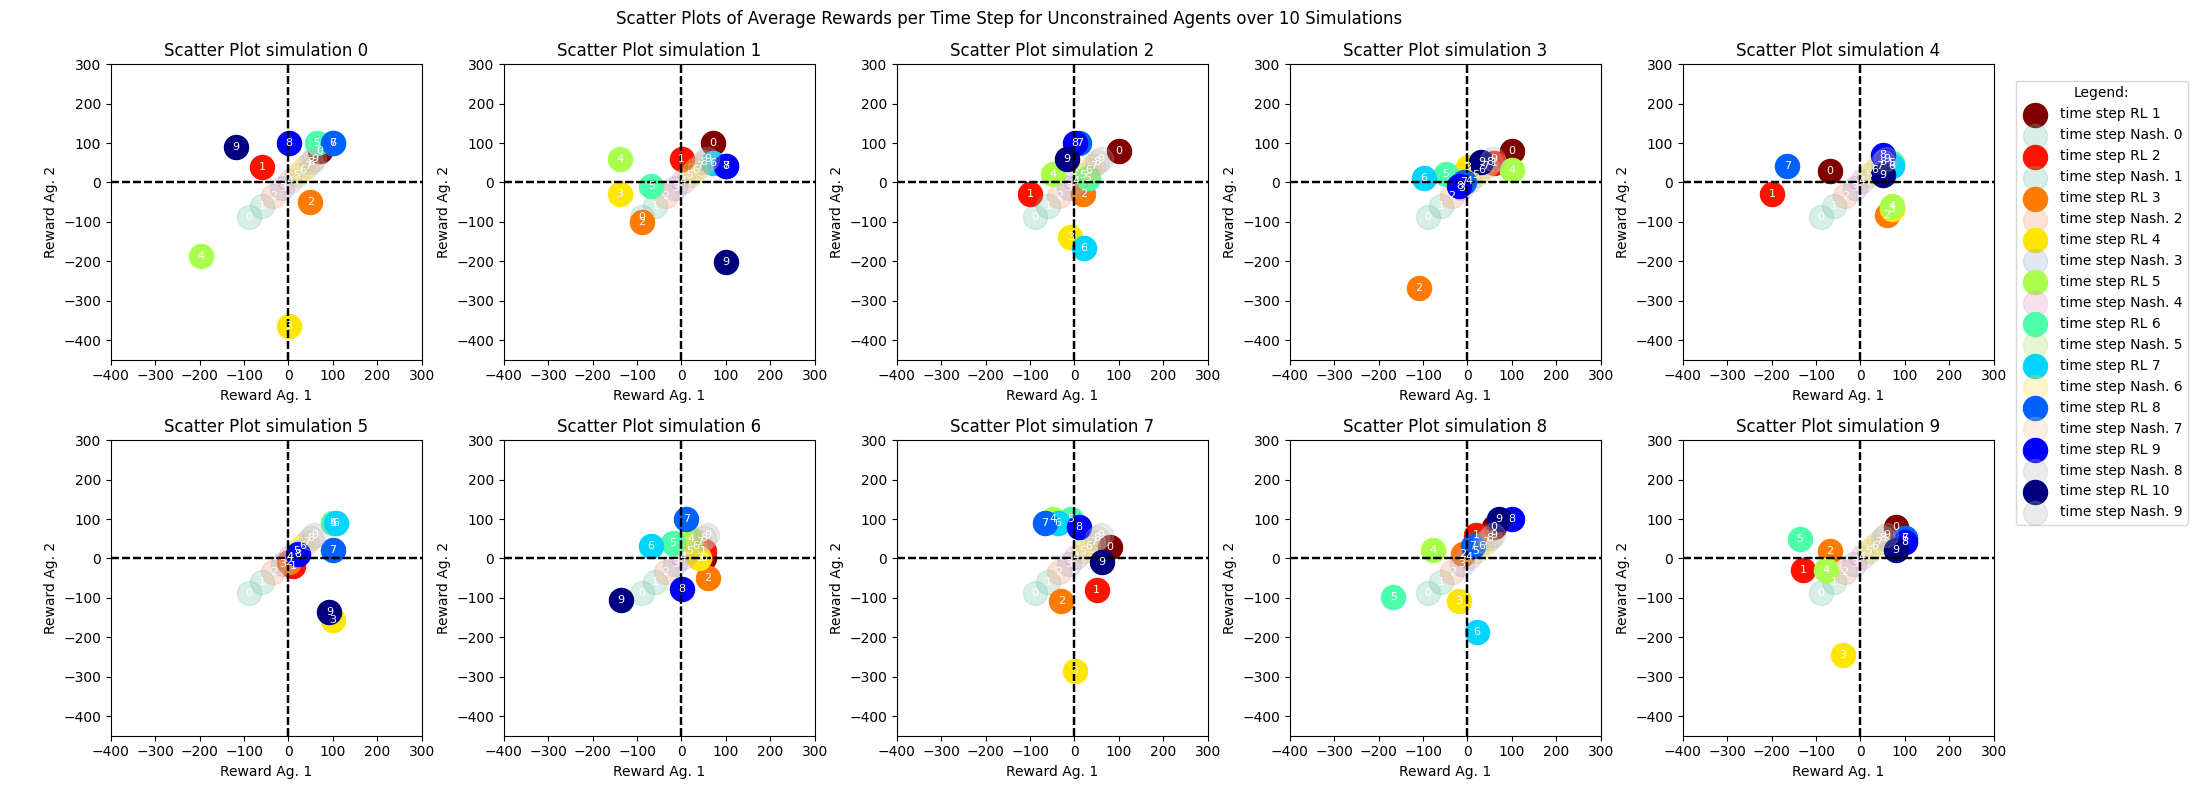

In [10]:
'''Rewards scatter plot per simulation'''
re_tot = np.load('C:/Users/macri/Desktop/10_zero_vol/re_tot.npy')
rewards_sch_1 =  (np.load('C:/Users/macri/Desktop/10_molta_vol_0_01/nash/re_tot.npy', allow_pickle=True))
rewards_per_simulation(re_tot, rewards_sch_1)

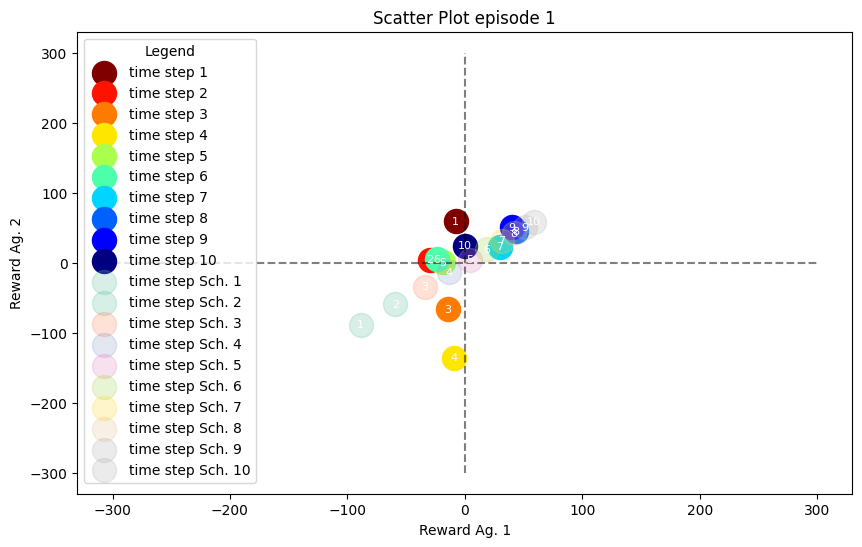

In [11]:
'''Rewards scatter plot per medi totali'''
re_tot = (np.load('C:/Users/macri/Desktop/10_zero_vol/re_tot.npy'))
rewards_sch =  (np.load('C:/Users/macri/Desktop/10_zero_vol/nash/re_tot.npy', allow_pickle=True))

rewards_per_episode_1_solo(re_tot[:,0].mean(0), re_tot[:,1].mean(0), rewards_sch[:,0].mean(0),  rewards_sch[:,1].mean(0), 1)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


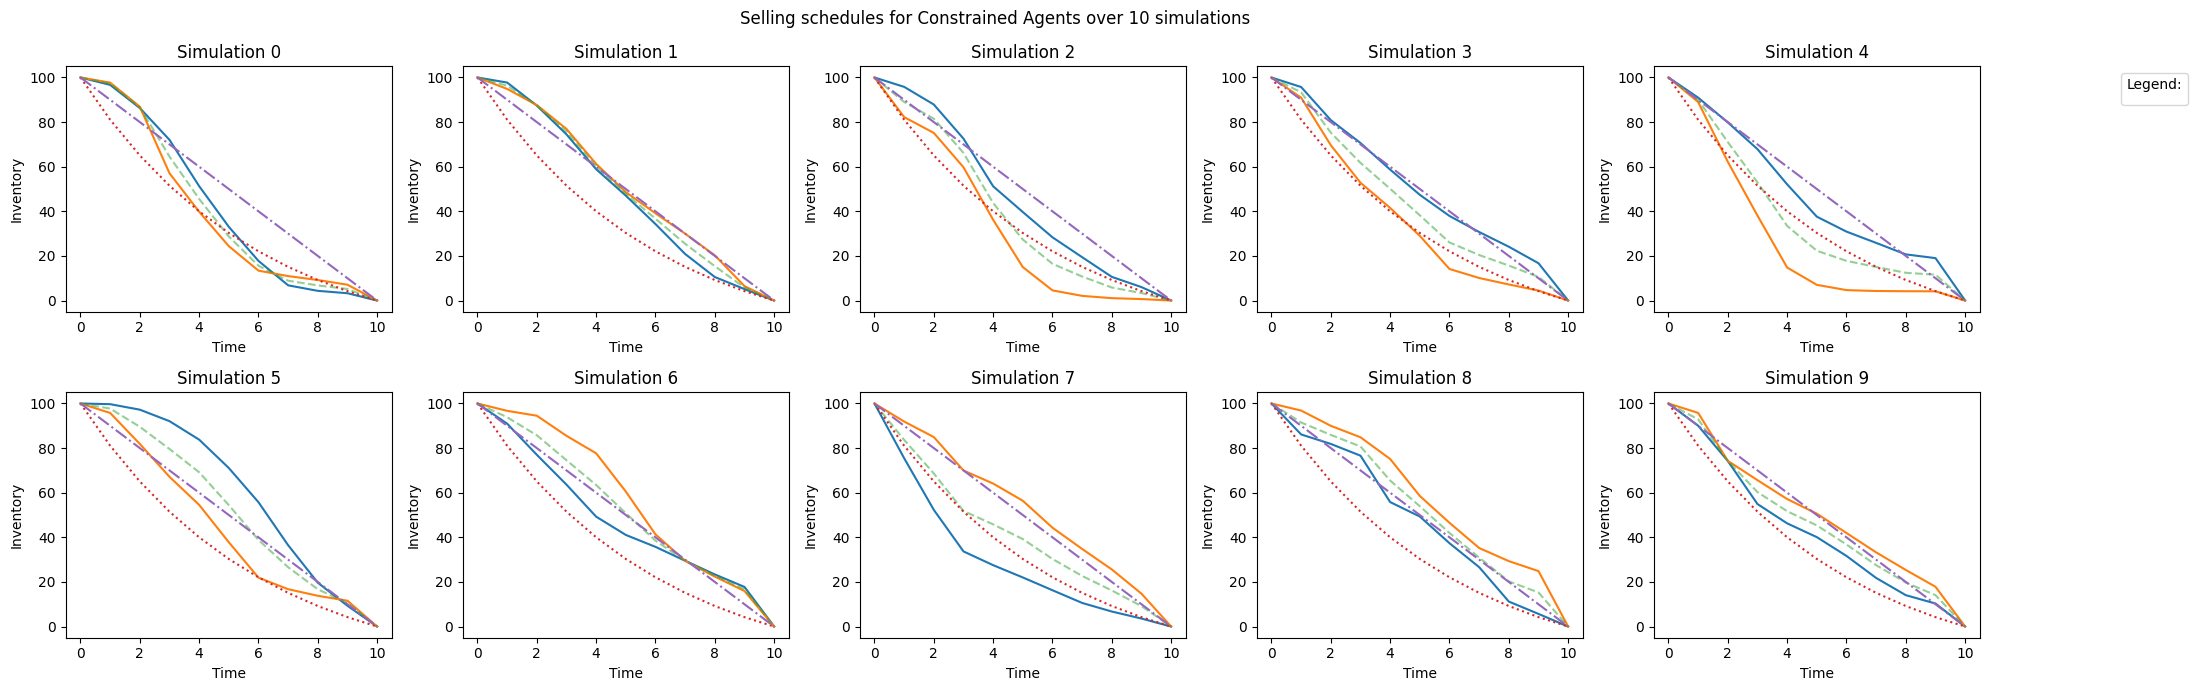

In [12]:
'''Selling Schedules'''

def make_selling_schedule(a, azioni, T, i=0, inv=100):
    azioni_tot_1 = azioni[i, 0]
    azioni_tot_2 = azioni[i, 1]
    agent_1 = azioni_tot_1.mean(axis=1)
    agent_2 = azioni_tot_2.mean(axis=1)
    
    q0_1 = np.zeros(T + 1)
    q0_1[0] = inv
    for j in range(1, T):
        q0_1[j] = q0_1[j - 1] - agent_1[j - 1]
    q0_2 = np.zeros(T + 1)
    q0_2[0] = inv
    for j in range(1, T):
        q0_2[j] = q0_2[j - 1] - agent_2[j - 1]
    q_tot = inv# * 2
    azioni_t = (agent_1 + agent_2) / 2
    qt = np.zeros(T + 1)
    qt[0] = q_tot
    for j in range(1, T):
        qt[j] = qt[j - 1] - azioni_t[j - 1]

    azioni_tw = np.ones((5_000,10)) * 10
    twat = azioni_tw.reshape(-1,10).mean(0)
    twap = np.zeros(11) 
    twap[0] = 100
    for i in range(1,10):
        twap[i] =  twap[i - 1] - twat[i - 1]

    b = np.asarray(a) / 2

    ax.plot(q0_1, label='Agent 1' if i == 0 else None)
    ax.plot(q0_2, label='Agent 2' if i == 0 else None)
    ax.plot(qt, alpha = 0.5, label='Mean Agents' if i == 0 else None, linestyle='--')
    ax.plot(b, label='Nash Agent'if i == 0 else None, linestyle=':')
    ax.plot(twap, label = 'twap' if i == 0 else None, linestyle='-.')

def do_is(i, dati, azioni, alpha=0.002):
    dati =      dati[i,:,0]
    azioni1 =  azioni[i, 0]
    azioni2 =  azioni[i, 0]
    azioni = (azioni1 + azioni2)
    iss = []

    for i in range(dati.reshape(-1,T).shape[0]):
        iss.append((dati.reshape(-1,T)[i])* azioni[:,i] - alpha * azioni[:,i]**2)

    agents = np.sum((np.asarray(iss)),axis=1)
    agents_std = np.sum((np.asarray(iss)),axis=1).std()

    return 2000-remove_outliers(agents).mean(),  agents_std


# Load data
azioni_tot = np.load('C:/Users/macri/Desktop/ennesima/azioni_tot.npy', allow_pickle=True)
dati =       np.load('C:/Users/macri/Desktop/ennesima/dati_tot.npy', allow_pickle=True)
T = len(azioni_tot[0, 0])

# Create subplots
fig, axs = plt.subplots(2, 5, figsize=(20, 7))

# Plot each selling schedule
for i, ax in enumerate(axs.flat):
    make_selling_schedule(a, azioni_tot, T, i, 100)
    ax.set_title(f"Simulation {i}")
    ax.set_xlabel('Time')
    ax.set_ylabel('Inventory')
    IS, IS_std = do_is(i, dati, azioni_tot, alpha = 0.002)
    #ax.text(0.5, -0.5, f'ave. IS agents: {IS:.2f}, std:{IS_std:.2f}', ha='center', va='center', transform=ax.transAxes)
    #ax.text(0.5, -0.7, f'std. IS agents: {IS_std:.2f}', ha='center', va='center', transform=ax.transAxes)
     
fig.suptitle('Selling schedules for Constrained Agents over 10 simulations')

# Add legend to last subplot
fig.legend(loc='upper right', bbox_to_anchor=(1.1, 0.9), title='Legend:')

# Adjust layout
#fig.text(0.5, 0.01, f'The simulated theoretical average IS is: {27.31:.2f}, the simulated theoretical std. dev. IS is: {0.0025:.4f}', ha='center')

plt.tight_layout()
plt.show()

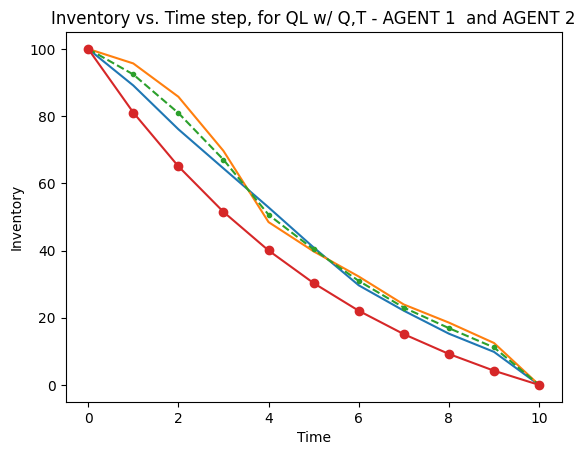

In [13]:
'''Selling schedule media'''
agente_0, agente_1, agente_medio, twap = process_data('C:/Users/macri/Desktop/10_zero_vol/azioni_tot.npy')

plt.plot(agente_0)
plt.plot(agente_1)
#plt.plot(twap)
plt.plot((agente_0 +agente_1)/2, '.--')
b = np.asarray(a)/2
plt.plot(b,'o-')
plt.ylabel('Inventory')
plt.xlabel('Time')
plt.title('Inventory vs. Time step, for QL w/ Q,T - AGENT 1  and AGENT 2')
plt.show()

$\sigma = 0.001$
===

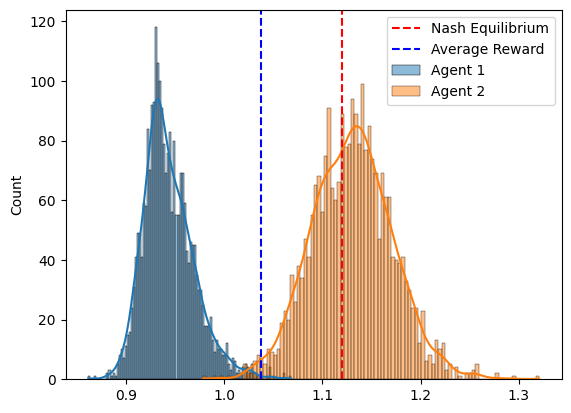

In [14]:
'''Plot dei rewards totali'''
rewards = (np.load('C:/Users/macri/Desktop/10_media_vol_0_001/re_tot.npy', allow_pickle=True))
rewards_sch = (np.load('C:/Users/macri/Desktop/10_media_vol_0_001/nash/re_tot.npy', allow_pickle=True))

sns.histplot(remove_outliers(rewards[:,0].mean(axis=0).mean(0)), bins=100, kde=True, label='Agent 1');
sns.histplot(remove_outliers(rewards[:,1].mean(axis=0).mean(0)), bins=100, kde=True, label='Agent 2');
plt.axvline(x=1.12, color='r', linestyle='--', label='Nash Equilibrium')
plt.axvline(x=(rewards[:,0].mean(axis=1).mean(0).mean() + (rewards[:,1].mean(axis=1).mean(0).mean()))/2, color='b', linestyle='--', label='Average Reward')
plt.legend()
plt.show()

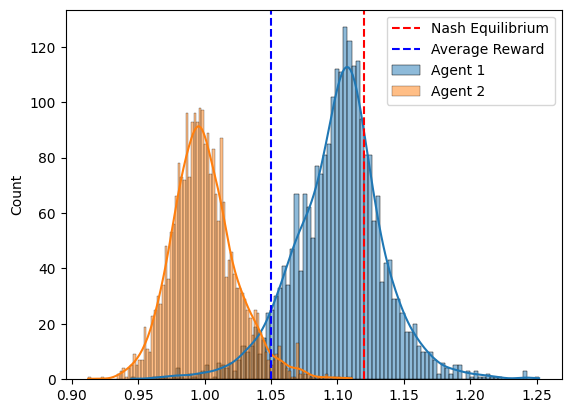

In [15]:
'''Plot dei rewards totali'''
rewards = (np.load('C:/Users/macri/Desktop/10_media_vol_0_001/altra_contrario/re_tot.npy', allow_pickle=True))
rewards_sch = (np.load('C:/Users/macri/Desktop/10_media_vol_0_001/nash/re_tot.npy', allow_pickle=True))

sns.histplot(remove_outliers(rewards[:,0].mean(axis=0).mean(0)), bins=100, kde=True, label='Agent 1');
sns.histplot(remove_outliers(rewards[:,1].mean(axis=0).mean(0)), bins=100, kde=True, label='Agent 2');
plt.axvline(x=1.12, color='r', linestyle='--', label='Nash Equilibrium')
plt.axvline(x=(rewards[:,0].mean(axis=1).mean(0).mean() + (rewards[:,1].mean(axis=1).mean(0).mean()))/2, color='b', linestyle='--', label='Average Reward')
plt.legend()
plt.show()

In [16]:
'''t-tests'''

from scipy import stats
print(
't-test agent 1 vs nash',stats.ttest_ind(rewards[:,1].mean(0).flatten(), rewards_sch[:,0].flatten(), equal_var=False),'\n'
't-test agent 2 vs nash',stats.ttest_ind(rewards[:,0].mean(0).flatten(), rewards_sch[:,1].flatten(), equal_var=False), '\n'
't-test agent 1 vs agent 2',stats.ttest_ind(rewards[:,0].mean(0).mean(0).flatten(), rewards[:,1].mean(0).mean(0).flatten(), equal_var=False))

t-test agent 1 vs nash Ttest_indResult(statistic=-0.5086130598991738, pvalue=0.6110273090789764) 
t-test agent 2 vs nash Ttest_indResult(statistic=-0.08186528515460076, pvalue=0.9347544106287521) 
t-test agent 1 vs agent 2 Ttest_indResult(statistic=119.59957557054001, pvalue=0.0)


KeyboardInterrupt: 

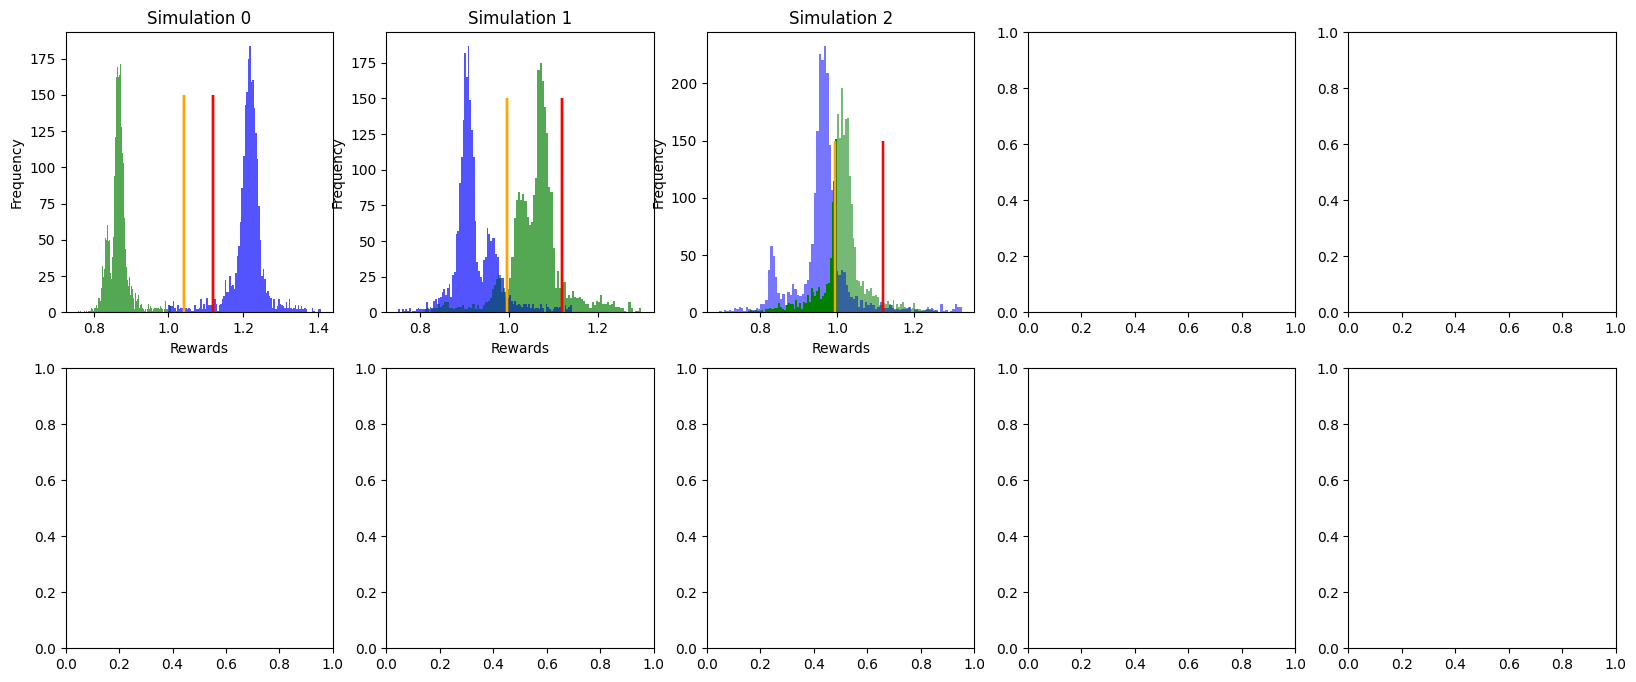

In [17]:
'''Istogramma dei rewards per simulazione'''
rewards = np.load('C:/Users/macri/Desktop/10_media_vol_0_001/ALTRA_SIMILE/re_tot.npy', allow_pickle=True)
rewards_per_simulation_hist(rewards, rewards_sch)

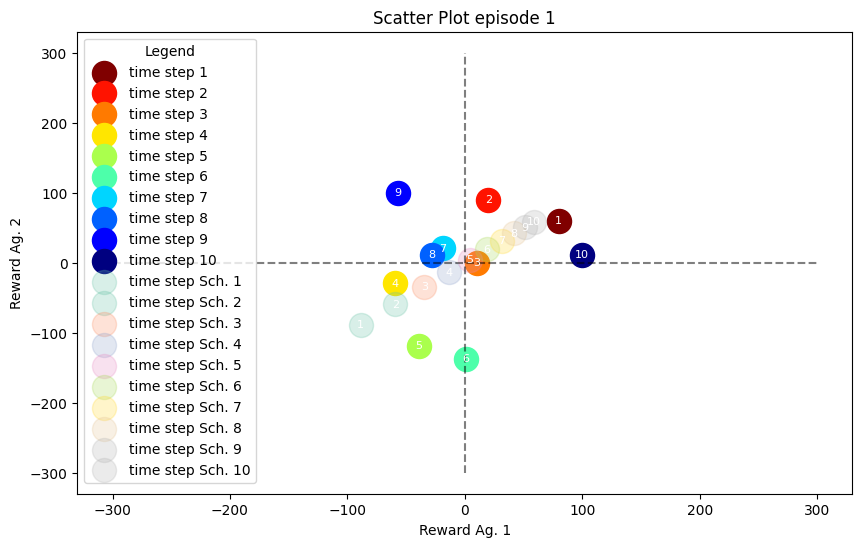

In [ ]:
'''Rewards scatter plot per medi totali'''
re_tot = (np.load('C:/Users/macri/Desktop/10_media_vol_0_001/re_tot.npy'))
rewards_sch =  (np.load('C:/Users/macri/Desktop/10_media_vol_0_001/nash/re_tot.npy', allow_pickle=True))

rewards_per_episode_1_solo(re_tot[:,0].mean(0), re_tot[:,1].mean(0), rewards_sch[:,0].mean(0),  rewards_sch[:,1].mean(0), 1)


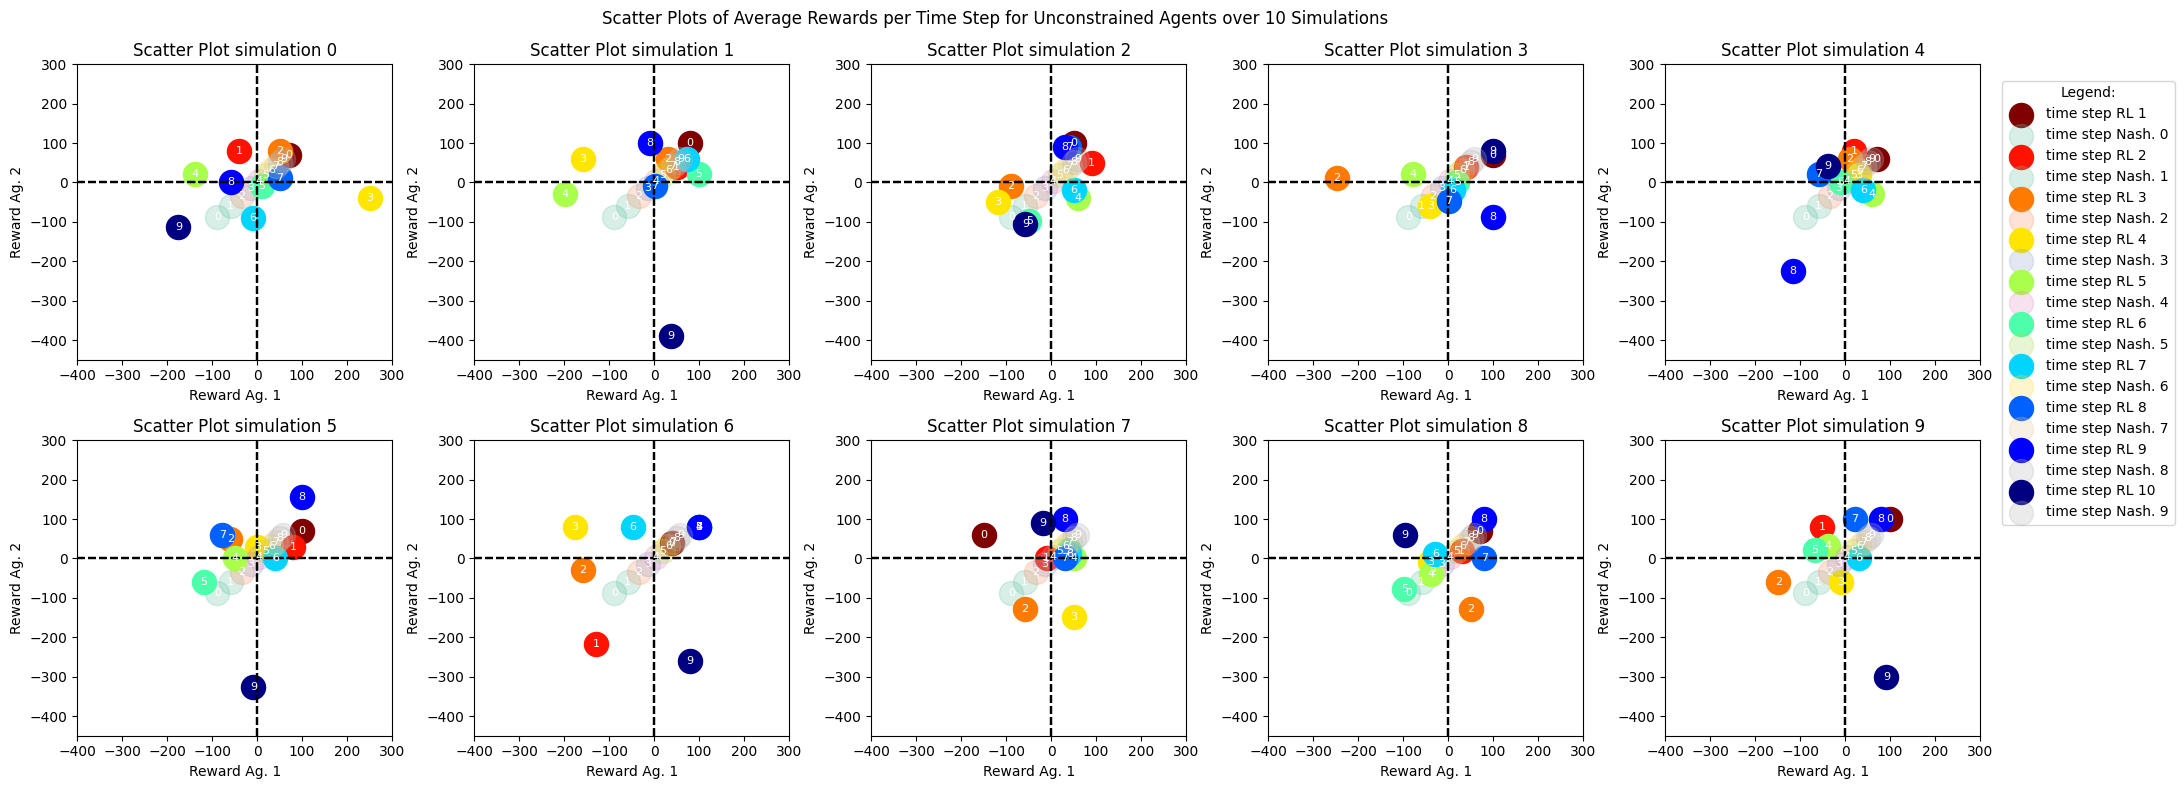

In [ ]:
'''Rewards scatter plot per simulation'''
re_tot = np.load('C:/Users/macri/Desktop/10_media_vol_0_001/re_tot.npy')
rewards_sch_1 =  (np.load('C:/Users/macri/Desktop/10_media_vol_0_001/nash/re_tot.npy', allow_pickle=True))
rewards_per_simulation(re_tot, rewards_sch_1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


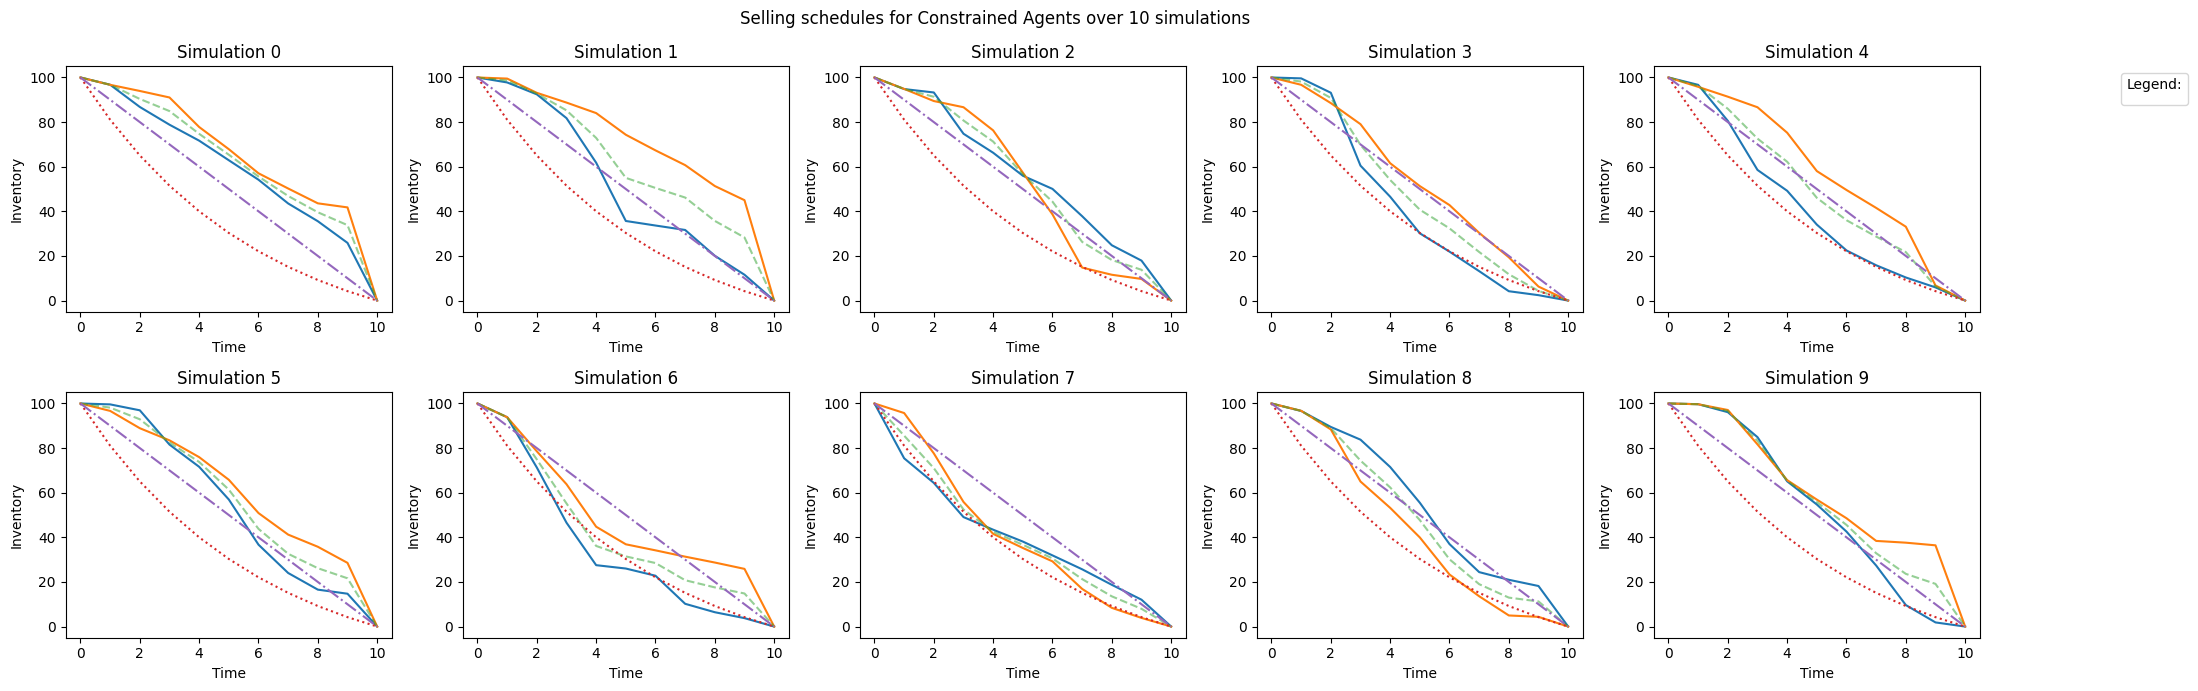

In [ ]:
'''Selling Schedules'''

# Load data
azioni_tot = np.load('C:/Users/macri/Desktop/10_media_vol_0_001/azioni_tot.npy', allow_pickle=True)
dati =       np.load('C:/Users/macri/Desktop/10_media_vol_0_001/dati_tot.npy', allow_pickle=True)
T = len(azioni_tot[0, 0])

# Create subplots
fig, axs = plt.subplots(2, 5, figsize=(20, 7))

# Plot each selling schedule
for i, ax in enumerate(axs.flat):
    make_selling_schedule(a, azioni_tot, T, i, 100)
    ax.set_title(f"Simulation {i}")
    ax.set_xlabel('Time')
    ax.set_ylabel('Inventory')
    IS, IS_std = do_is(i, dati, azioni_tot, alpha = 0.002)
    #ax.text(0.5, -0.5, f'ave. IS agents: {IS:.2f}, std:{IS_std:.2f}', ha='center', va='center', transform=ax.transAxes)
    #ax.text(0.5, -0.7, f'std. IS agents: {IS_std:.2f}', ha='center', va='center', transform=ax.transAxes)
     
fig.suptitle('Selling schedules for Constrained Agents over 10 simulations')

# Add legend to last subplot
fig.legend(loc='upper right', bbox_to_anchor=(1.1, 0.9), title='Legend:')

# Adjust layout
#fig.text(0.5, 0.01, f'The simulated theoretical average IS is: {27.31:.2f}, the simulated theoretical std. dev. IS is: {0.0025:.4f}', ha='center')

plt.tight_layout()
plt.show()

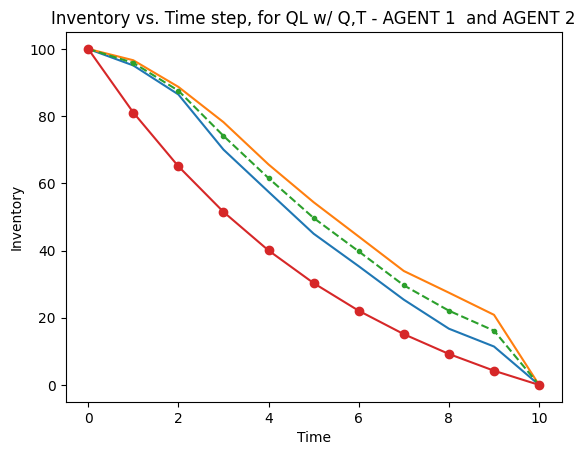

In [ ]:
'''Selling schedule media'''
agente_0, agente_1, agente_medio, twap = process_data('C:/Users/macri/Desktop/10_media_vol_0_001/azioni_tot.npy')

plt.plot(agente_0)
plt.plot(agente_1)
#plt.plot(twap)
plt.plot((agente_0 +agente_1)/2, '.--')
b = np.asarray(a)/2
plt.plot(b,'o-')
plt.ylabel('Inventory')
plt.xlabel('Time')
plt.title('Inventory vs. Time step, for QL w/ Q,T - AGENT 1  and AGENT 2')
plt.show()

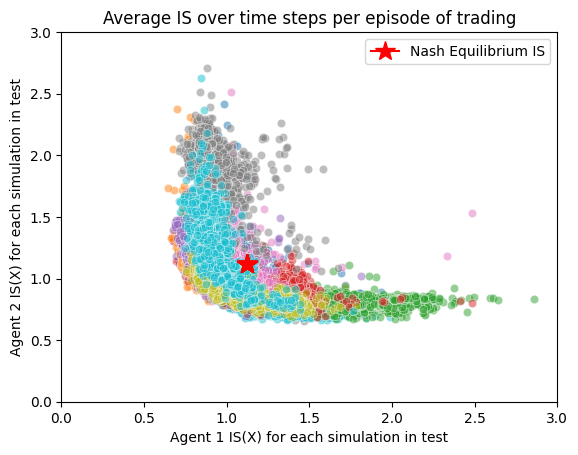

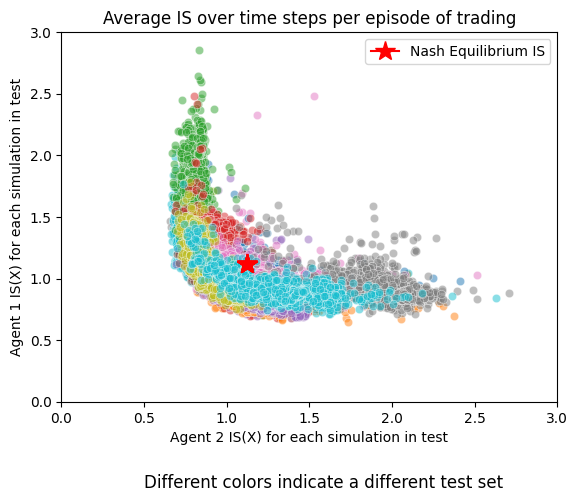

In [ ]:
re_tot_al  = (np.load('C:/Users/macri/Desktop/10_media_vol_0_001/re_tot.npy'))
re_tot_2  = (np.load('C:/Users/macri/Desktop/10_media_vol_0_001/ALTRA_SIMILE/re_tot.npy'))
re_tot_zero = (np.load('C:/Users/macri/Desktop/10_media_vol_0_001/altra_contrario/re_tot.npy'))

re_sch = dict(np.load('C:/Users/macri/Desktop/10_media_vol_0_001/nash/re.npz'))['arr_0']
nash = re_sch.mean(0).mean(0).mean()

for i in range(10):
    sns.scatterplot(x=re_tot_2[i, 1].mean(0), y=re_tot_2   [i, 0].mean(0), alpha=0.5)
    sns.scatterplot(x=re_tot_zero[i, 1].mean(0), y=re_tot_zero   [i, 0].mean(0), alpha=0.5)

    plt.plot(nash, nash, marker='*', markersize=15, color='red', label = 'Nash Equilibrium IS' if i == 0 else None)

plt.ylim(0, 3)
plt.xlim(0, 3)

plt.xlabel(r'Agent 1 IS(X) for each simulation in test')
plt.ylabel(r'Agent 2 IS(X) for each simulation in test')
plt.title('Average IS over time steps per episode of trading')    
plt.legend()
plt.show()

for i in range(10):
    sns.scatterplot(y=re_tot_2[i, 1].mean(0), x=re_tot_2   [i, 0].mean(0), alpha=0.5)
    sns.scatterplot(y=re_tot_zero[i, 1].mean(0), x=re_tot_zero   [i, 0].mean(0), alpha=0.5)
    plt.plot(nash, nash, marker='*', markersize=15, color='red', label = 'Nash Equilibrium IS' if i == 0 else None)
    
plt.ylim(0, 3)
plt.xlim(0, 3)

plt.xlabel(r'Agent 2 IS(X) for each simulation in test')
plt.ylabel(r'Agent 1 IS(X) for each simulation in test')
plt.title('Average IS over time steps per episode of trading')    
plt.text(0.5, -0.7, 'Different colors indicate a different test set', fontsize=12)
plt.legend()
plt.show()